# Linear Regression - Class Exercise 3

## Introduction

## Metadata (Data Dictionary)

| No.| Variable | Data Type | Description |
|----|----------|-----------|-------------|
| 1  | customerID | string | ID of the customer |
| 2  | gender | string | Gender of the customer |
| 3  | SeniorCitizen | int | Whether the customer is a senior citizen (1) or not (0) |
| 4  | Partner | string | Whether the customer has a partner |
| 5  | Dependents | string | Whether the customer has dependent(s) |
| 6  | tenure | int | The duration as a customer (months) |
| 7  | PhoneService | string | Whether the customer subscribed to the phone service |
| 8  | MultipleLines | string | Whether the customer subscribed to multiple phone services |
| 9  | InternetService | string | Type of Internet Service |
| 10 | OnlineSecurity | string | Whether the customer subscribed to online security |
| 11 | OnlineBackup | string | Whether the customer subscribed to online backup |
| 12 | DeviceProtection | string | Whether the customer subscribed to online device protection |
| 13 | TechSupport | string | Whether the customer subscribed to technical support |
| 14 | StreamingTV | string | Whether the customer subscribed to streaming TV |
| 15 | StreamingMovies | string | Whether the customer subscribed to streaming movies |
| 16 | Contract | string | Type of Contract |
| 17 | PaperlessBilling | string | Whether the customer activated paperless billing |
| 18 | PaymentMethod | string | Payment method of the customer |
| 19 | MonthlyCharges | float | Monthly charge of the customer |
| 20 | TotalCharges | float | Total Charges of the customer |
| 21 | Churn | string | Whether the customer left within the last month or not |


## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

<font color=red><b>Action</b>: Load the data file and check against the metadata.

In [2]:
df = pd.read_csv('Customer-Churn-Telco.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,NaN,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
label = 'Churn'
not_features = [label, 'customerID']
features = [feature for feature in list(df) if feature not in not_features]
features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [4]:
non_numeric_columns = [feature for feature in features if feature not in list(df.describe())]
non_numeric_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [5]:
for non_numeric_column in non_numeric_columns:
    display(df[non_numeric_column].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4932
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2970
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2420
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3472
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2809
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Yes    4170
No     2872
Name: PaperlessBilling, dtype: int64

Electronic check             2363
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
mask = df['TotalCharges'].map(lambda x: x.replace('.', '').isdigit() and x.count('.') < 2)
df['TotalCharges'][~mask]

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [8]:
df['TotalCharges'] = df['TotalCharges'].map(lambda x: x.replace(' ', '')).map(lambda x: np.nan if x == '' else x).astype('float64')
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [19]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [15]:
non_numeric_columns = [feature for feature in features if feature not in list(df.describe())]
for non_numeric_column in non_numeric_columns:
    display(df[non_numeric_column].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4932
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2970
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2420
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3472
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2809
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Yes    4170
No     2872
Name: PaperlessBilling, dtype: int64

Electronic check             2363
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [20]:
for non_numeric_column in non_numeric_columns:
    display(df[[non_numeric_column, label]].groupby([non_numeric_column]).mean())

,Churn
gender,
Female,0.269209
Male,0.261603


,Churn
Partner,
No,0.329580
Yes,0.196649


,Churn
Dependents,
No,0.312855
Yes,0.154502


,Churn
PhoneService,
No,0.249267
Yes,0.267096


,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286195


,Churn
InternetService,
DSL,0.189669
Fiber optic,0.418928
No,0.074050


,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


,Churn
TechSupport,
No,0.416187
No internet service,0.074050
Yes,0.151663


,Churn
StreamingTV,
No,0.334995
No internet service,0.074050
Yes,0.300702


,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


,Churn
PaperlessBilling,
No,0.163301
Yes,0.335731


,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.453237
Mailed check,0.191067


In [10]:
feature_mapper = {'gender': {'Male': 0, 'Female': 1}}

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7041.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.383326,64.761692,2283.300441,0.265370
std,0.368612,24.633669,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,196.000000,118.750000,8684.800000,1.000000


In [39]:
z = df['tenure'].fillna(df['tenure'].median()).to_numpy()

{'whiskers': [<matplotlib.lines.Line2D at 0x271d7f8de20>,
 'caps': [<matplotlib.lines.Line2D at 0x271d7f9e400>,
 'boxes': [<matplotlib.lines.Line2D at 0x271d7f8db20>],
 'medians': [<matplotlib.lines.Line2D at 0x271d7f9e9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x271d7f9ec70>],
 'means': []}

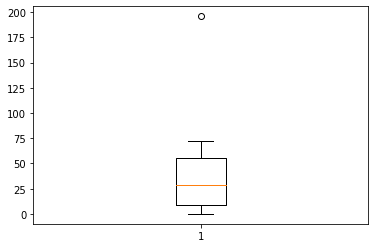

In [40]:
plt.boxplot(z)

In [32]:
data = np.random.normal(100, 20, 200)
data

array([108.08846916,  64.16595791,  94.2553793 ,  85.39165892,
        81.90996808, 126.37034217, 130.34362788,  72.48870138,
        97.93496373, 132.54589625,  99.36176899,  86.179841  ,
        93.38622841,  94.4040219 ,  95.798427  ,  86.66829384,
       109.16139194, 105.39560907,  72.85721047,  72.75976937,
        82.16747602,  68.50569495,  84.36003561, 126.90506375,
        71.22589814, 116.10332795, 101.98294194,  41.68363869,
       106.87110885,  80.5545977 ,  81.03010282, 136.35434402,
       102.07471979,  85.99615137,  79.55622083,  98.64003535,
       101.30334876,  56.89913734, 150.44124937,  84.05916625,
       103.86714603, 106.0515491 , 105.84900251,  95.82628015,
       112.62871332, 120.6568938 ,  69.78041382,  87.95968131,
       114.65638943,  60.10555895, 127.31251175, 102.24414987,
        77.63982397, 100.68266273,  75.54043377, 114.28464659,
        81.00798487,  92.38153422, 133.45513411, 120.40272991,
        88.24630308,  80.5251419 , 124.18421626,  82.60

{'whiskers': [<matplotlib.lines.Line2D at 0x271d762d5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x271d762db80>,
 'boxes': [<matplotlib.lines.Line2D at 0x271d762de80>],
 'medians': [<matplotlib.lines.Line2D at 0x271d4ba8790>],
 'fliers': [<matplotlib.lines.Line2D at 0x271d6902e50>],
 'means': []}

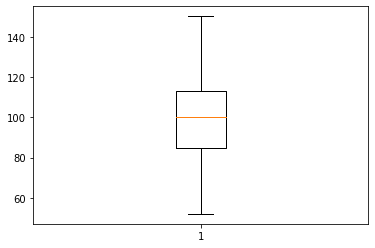

In [31]:
plt.boxplot(data)

In [11]:
train_x = df[features]
train_y = df[label]

In [12]:
from sklearn.naive_bayes import MultinomialNB

In [13]:
gnb = MultinomialNB()

In [14]:
y_pred = gnb.fit(train_x, train_y).predict(train_x)

ValueError: could not convert string to float: 'Female'

In [ ]:
y_pred